<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# AI in Finance

**Workshop at Texas State University (October 2023)**

**_Quantitative Finance with ChatGPT_**

Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

**<p style="color:green">All of the following examples are generated with ChatGPT Plus (GPT 4.0) unless indicated otherwise.</p>**

## Black-Scholes-Merton (1973) Option Pricing

### Mathematics Questions

Prompt:

> <p style="color:blue; font-weight: bold">Which role does the heat equation play in the Black-Scholes-Merton (1973) option pricing model?

Answer:
    
"The Black-Scholes-Merton model is a mathematical model used in financial mathematics to calculate the theoretical price of options. The model was developed by economists Fischer Black, Myron Scholes, and Robert Merton in 1973.

The heat equation plays a significant role in the Black-Scholes-Merton model. Here's how:

The Black-Scholes-Merton equation is a partial differential equation (PDE) that describes how the price of an option evolves over time. This PDE is similar in form to the heat equation, which is a well-studied equation in physics that describes how heat diffuses through a solid medium over time.

The Black-Scholes-Merton equation and the heat equation are both second-order parabolic partial differential equations. The Black-Scholes-Merton equation can actually be transformed into the heat equation through a change of variables. This transformation allows the use of well-established methods for solving the heat equation to solve the Black-Scholes-Merton equation.

The heat equation analogy is useful because it provides intuition about the behavior of option prices. Just as heat diffuses from areas of high temperature to areas of low temperature, in the Black-Scholes-Merton model, the "heat" (or information about the underlying asset's price) diffuses through the option price.

In summary, the heat equation plays a crucial role in the Black-Scholes-Merton model by providing a mathematical framework for solving the model and offering an intuitive understanding of how option prices evolve over time."

Prompt:

> <p style="color:blue; font-weight: bold">Provide the mathematical details.

Answer:

"Sure, let's dive into the mathematical details.

The Black-Scholes-Merton model is described by the following partial differential equation (PDE):

$$
\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$

where:
- $V$ is the price of the option as a function of stock price \(S\) and time \(t\),
- $\sigma$ is the volatility of the underlying stock,
- $r$ is the risk-free interest rate.

This PDE can be transformed into the heat equation through a change of variables. The transformation involves defining a new variable \(x\) and a new function \(u(x,t)\) as follows:

$$
x = \ln(S/K) + (r + \sigma^2 / 2) t
$$

and

$$
u(x,t) = e^{rt} V(S,t)
$$

where $K$ is the strike price of the option.

Substituting these variables into the Black-Scholes-Merton equation and simplifying, we get the heat equation:

$$
\frac{\partial u}{\partial t} = \frac{1}{2} \sigma^2 \frac{\partial^2 u}{\partial x^2}
$$

This is a standard heat equation, and it can be solved using well-known methods from the theory of PDEs. Once a solution \(u(x,t)\) is found, it can be transformed back into a solution for the original variable \(V(S,t)\) using the inverse of the above transformations.

This transformation is a powerful tool because it allows us to apply the well-developed mathematical theory of the heat equation to solve the Black-Scholes-Merton model."

### European Put Option pricing with Python (ChatGPT)

**<p style="color:green">This prompt and the rest of the ChatGPT answers are from the same chat (context).</p>**

The following example parametrization is taken from [Longstaff-Schwartz (2001)](https://people.math.ethz.ch/~hjfurrer/teaching/LongstaffSchwartzAmericanOptionsLeastSquareMonteCarlo.pdf): "Valuing American Options by Simulation:
A Simple Least-Squares Approach." _The Review of Financial Studies_, Spring 2001, Vol. 14. No. 1, pp. 113-147. 

Prompt:
    
> <p style="color:blue; font-weight: bold">Assume a financial model as in Black-Scholes (1973) with the following parameters for the geometric Brownian motion: S0 = 36, T = 1.0, r = 0.06, sigma = 0.2. Implement Python code for the Black-Scholes options pricing formula and value a European put option, with strike price of K = 40, with that Python code.    

Answer:

> Sure, I can certainly help you with that. Here is a Python code implementing the Black-Scholes options pricing formula:

In [1]:
import math
from scipy.stats import norm

def black_scholes_put(S0, K, T, r, sigma):
    """
    Parameters:
    S0: Initial stock price
    K: Strike price
    T: Time to maturity in years
    r: Risk-free rate
    sigma: Volatility
    
    Returns:
    Put value according to the Black-Scholes formula
    """

    # calculate d1 and d2 parameters
    d1 = (math.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    # calculate put value
    put_value = K * math.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    
    return put_value


# parameters
S0 = 36.0
K = 40.0
T = 1.0
r = 0.06
sigma = 0.2

put_value = black_scholes_put(S0, K, T, r, sigma)
print(f"The value of the European put option is: {put_value:.3f}")  # YJH: changed to 3 digits

The value of the European put option is: 3.844


> You can run this code in any environment that supports Python. It calculates the value of the European put option under the given conditions according to the Black-Scholes formula. Please note that this code assumes that the underlying follows a geometric Brownian motion, which is one of the key assumptions of the Black-Scholes model.

<p style=color:green>The reported value is 3.844 (see LS2001, Table 1, p. 137).</p>

## European Put Option pricing with Python (Bard)

Prompt:
    
> <p style="color:blue; font-weight: bold">Assume a financial model as in Black-Scholes (1973) with the following parameters for the geometric Brownian motion: S0 = 36, T = 1.0, r = 0.06, sigma = 0.2. Implement Python code for the Black-Scholes options pricing formula and value a European put option, with strike price of K = 40, with that Python code.    

Answer:

> Sure, here is the Python code for the Black-Scholes options pricing formula:

```python
import math

def black_scholes(S0, T, r, sigma, K):
  d1 = (math.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
  d2 = d1 - sigma * math.sqrt(T)
  N(d1) = math.normcdf(d1)  # error: assignment, error: function non-existent
  N(d2) = math.normcdf(d2)  # error: assignment, error: function non-existent
  C = S0 * N(d1) - K * math.exp(-r * T) * N(d2)  # conceptual error: call option (!)
  return C

# Parameters
S0 = 36
T = 1.0
r = 0.06
sigma = 0.2
K = 40

# Price of European put option
C = black_scholes(S0, T, r, sigma, K)
print(C)
```

> The output of the code is:

    -1.6658358345832407  # conceptual error: option values can't be negative

<p style=color:red>None of the three code options Bard provided did execute. The code has simple Python errors and conceptual errors. The reported output is also theoretically/practically impossible.</p>

<p style=color:red>Three additionally generated answers contained basically the same Python "nonsense" &mdash; usually in some variant. E.g. `norm.cdf()` (instead of `math.normcdf()`) without proper import of `scipy.stats.norm`).
</p>
    
<p style=color:red>I didn't try any of the following GhatGPT examples with Bard ...</p>

### European Put option pricing with Rust

Prompt:

> <p style="color:blue; font-weight: bold">Now provide the same solution in Rust.

Answer:

> Sure, here's how you could implement the Black-Scholes formula in Rust for a European put option. We use the statrs crate for the cumulative distribution function (CDF) of the standard normal distribution.

> Make sure to include statrs in your Cargo.toml file:

    [dependencies]
    statrs = "0.14.0"

> Now here is the Rust code:

```rust
use std::f64;
use statrs::distribution::{Normal, Univariate};

fn black_scholes_put(s0: f64, k: f64, t: f64, r: f64, sigma: f64) -> f64 {
    let d1 = (f64::ln(s0 / k) + (r + 0.5 * sigma.powi(2)) * t) / (sigma * f64::sqrt(t));
    let d2 = d1 - sigma * f64::sqrt(t);

    let normal = Normal::new(0.0, 1.0).unwrap();

    k * f64::exp(-r * t) * normal.cdf(-d2) - s0 * normal.cdf(-d1)
}

fn main() {
    let s0 = 36.0;
    let k = 40.0;
    let t = 1.0;
    let r = 0.06;
    let sigma = 0.2;

    let put_value = black_scholes_put(s0, k, t, r, sigma);
    println!("The value of the European put option is: {:.2f}", put_value);
}
```

> This program calculates the value of a European put option given the initial stock price, the strike price, the time to maturity, the risk-free rate, and the volatility. Note that Rust requires careful handling of errors, hence the unwrap() after the Normal::new() function, which could panic if the standard deviation is not positive.

### Monte Carlo Simulation

Prompt:

> <p style="color:blue; font-weight: bold">Provide Python code that simulates the GBM under the previous assumptions I = 100,000 times with M = 50 time intervals and visualizes 250 of the simulated as a SVG graphic in Seaborn style with matplotlib.

Answer:

> Sure, I can certainly help with that. Below is the Python code for the simulation and visualization:

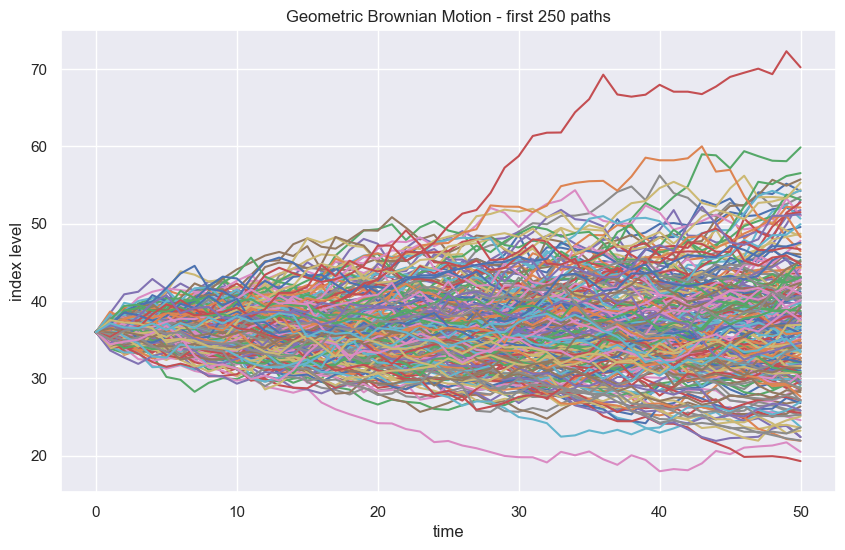

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# Set the seaborn style for the plot
seaborn.set()

# Geometric Brownian Motion parameters
S0 = 36
T = 1.0
r = 0.06
sigma = 0.2

# Simulation parameters
M = 50
dt = T / M
I = 100000

# Simulating I paths with M time steps
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * np.random.standard_normal(I))

# Plotting the first 250 paths
plt.figure(figsize=(10, 6))
plt.plot(S[:, :250], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.title('Geometric Brownian Motion - first 250 paths')
plt.grid(True)

# Save the plot as SVG file
plt.savefig("gbm_paths.svg", format='svg')

plt.show()

> The code above generates 100,000 paths with 50 time steps each for a Geometric Brownian Motion (GBM) process with the given parameters. It then plots the first 250 of these paths. The resulting plot is saved as an SVG file named "gbm_paths.svg". This code uses the numpy library for numerical computations and matplotlib for plotting. The seaborn library is used to improve the aesthetics of the plot.

### European Put Option Valuation with MCS

Prompt

> <p style="color:blue; font-weight: bold">Provide Python code that values the European put option based on the simulated paths.

Answer:

> Sure, you can use a Monte Carlo valuation for the European put option based on the simulated paths. Here is the Python code:

In [3]:
import numpy as np

# Geometric Brownian Motion parameters
S0 = 36
K = 40
T = 1.0
r = 0.06
sigma = 0.2

# Simulation parameters
M = 50
dt = T / M
I = 100000

# Simulating I paths with M time steps
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * np.random.standard_normal(I))

# Calculate the payoff at maturity for each path: max(K - S(T), 0)
payoff_at_maturity = np.maximum(K - S[-1], 0)

# Discount the payoff back to today
put_value_mc = np.exp(-r * T) * np.mean(payoff_at_maturity)

# YJH: changed to three digits
print(f"The value of the European put option based on Monte Carlo simulation is: {put_value_mc:.3f}") 

The value of the European put option based on Monte Carlo simulation is: 3.837


## American Put Option Valuation

### LSM Algorithm Explanation

Prompt:

> <p style="color:blue; font-weight: bold">Explain the key insights and aspects of the Least-Squares Monte Carlo algorithm according to Longstaff-Schwart (2001).

Answer:

"The Least-Squares Monte Carlo (LSM) algorithm proposed by Francis Longstaff and Eduardo Schwartz in 2001 is a numerical technique used primarily for the pricing of American-style options.

American options differ from European options in that they can be exercised any time up to maturity, not just at the expiration date. This feature makes them more challenging to price because one needs to determine the optimal early exercise strategy.

Here are the key insights and aspects of the LSM algorithm:

1. **Simulation of Paths**: Just like with the European option, the first step in the LSM algorithm is to simulate a large number of potential future price paths for the underlying asset. Each of these paths represents a possible future evolution of the asset's price.

2. **Working Backwards**: Unlike the Black-Scholes model, which works forward from the current time to the option's expiration, the LSM algorithm works backward from the expiration date. This backward induction is consistent with the optimal exercise property of American options, as the decision to exercise early depends on the potential future payoff of holding the option.

3. **Regression for Conditional Expectation**: At each time step, the LSM algorithm estimates the expected payoff of holding the option given the current price of the underlying. This is done by running a least-squares regression of the payoffs from all paths against the corresponding asset prices. The key assumption is that the conditional expectation of the payoff can be approximated by a function of the current asset price. Polynomial functions are typically used for this approximation.

4. **Optimal Exercise Decision**: Given the estimated expected future payoffs from the regression, the algorithm compares the payoff from exercising the option immediately with the expected payoff from holding it. If the immediate exercise payoff is higher, the option is deemed to be optimally exercised.

5. **Option Pricing**: The price of the option is then computed as the average discounted payoff across all paths, taking into account the optimal exercise decisions at each time step.

It's worth noting that while the LSM method is an ingenious solution to a complex problem, it does come with some assumptions and limitations. The accuracy of the algorithm depends on the quality of the regression at each step, which in turn relies on the choice of basis functions and the number of simulated paths. Additionally, while the method does account for the early exercise feature of American options, it may not be applicable or may require modifications for more complex derivatives or features."


### LSM Implementation

Prompt:

> <p style="color:blue; font-weight: bold">Under the previous model assumptions, provide Python code that values the American put option with the LSM algorithm.

Answer:

> Certainly, here's a Python implementation of the Least-Squares Monte Carlo method for pricing an American put option:

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Parameters
S0 = 36
K = 40
T = 1.0
r = 0.06
sigma = 0.2
M = 50
I = 100000

dt = T / M 

# Simulate paths
np.random.seed(0)
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * np.random.standard_normal(I))

# Initialize the cashflow matrix
cashflow = np.maximum(K - S[-1], 0)

# Discount factor
df = np.exp(-r * dt)

# Iterate backwards
for t in range(M - 1, 0, -1):

    # Select in-the-money paths
    itm = np.where(S[t] < K)[0]
    x = S[t, itm].reshape(-1, 1)
    y = df * cashflow[itm]

    # Fit regression
    model = LinearRegression()
    model.fit(x, y)

    # Continuation values
    continuation_value = model.predict(x)

    # Immediate exercise values
    exercise_value = np.maximum(K - S[t, itm], 0)

    # Update cashflow matrix
    cashflow[itm] = np.where(exercise_value > continuation_value, 
                             exercise_value, 
                             df * cashflow[itm])

# Discount back all cashflows to get the option price
V0 = df * np.mean(cashflow)

# YJH: Changed to three digits
print(f"The price of the American put option according to LSM is: {V0:.3f}")

The price of the American put option according to LSM is: 4.421


<p style=color:green>The reported value is 4.472 (see LS2001, Table 1, p. 137). See also the valuation with the binomial option pricing model below.</p>

> In this code, the paths of the underlying asset are first simulated in the same way as before. The algorithm then works backwards from the maturity of the option, at each step running a least-squares regression of the discounted future cashflows against the current asset price for in-the-money paths, comparing the continuation values from the regression with the immediate exercise values, and updating the cashflows accordingly. The price of the American option is computed as the discounted expected payoff at the start of the life of the option.

> Please note that this code uses the sklearn library for the least-squares regression. The choice of basis functions for the regression and the handling of in-the-money paths can be customized depending on the specific characteristics of the option and the underlying asset.

## Binomial Option Pricing of American Put Option

Prompt:

> <p style="color:blue; font-weight: bold">Implement the binomial option pricing model according to Cox-Ross-Rubinstein (1979) in Python to value the same American put option. Use NumPy ndarray objects and vectorized operations as far as possible. Assume 250 time steps for the binomial tree.

Answer:

> Sure, here's a Python implementation of the Cox-Ross-Rubinstein (CRR) binomial model for pricing an American put option:

In [5]:
import numpy as np

# Parameters
S0 = 36
K = 40
T = 1.0
r = 0.06
sigma = 0.2
N = 250  # Number of time steps in the binomial tree

dt = T / N  # Time step

u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor
p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

# Initialize price and option value trees
S = np.zeros((N + 1, N + 1))
V = np.zeros((N + 1, N + 1))

# Simulate the binomial price tree
S[0, 0] = S0
for i in range(1, N + 1):
    S[i, :i+1] = S0 * d**np.arange(i, -1, -1) * u**np.arange(0, i + 1)

# Calculate the terminal payoff
V[:, :N+1] = np.maximum(K - S[:, :N+1], 0)

# Backward induction
for i in range(N - 1, -1, -1):
    V[i, :i+1] = np.exp(-r * dt) * (p * V[i+1, 1:i+2] + (1 - p) * V[i+1, :i+1])
    V[i, :i+1] = np.maximum(V[i, :i+1], K - S[i, :i+1])  # Check for early exercise

V0 = V[0, 0]  # Value at t=0

# YJH: changed to three digits
print(f"The price of the American put option according to CRR is: {V0:.3f}")

The price of the American put option according to CRR is: 4.487


> In this code, a binomial tree is first constructed for the price of the underlying asset. The up and down factors are determined based on the volatility of the underlying and the time step. The risk-neutral probability is then calculated.

> The terminal payoffs of the option are calculated and the option values at earlier nodes are determined by backward induction. At each node, the option value is the maximum of the value if exercised immediately and the expected value if held to the next period, discounted back at the risk-free rate.

> This code uses NumPy ndarray objects and vectorized operations wherever possible for efficiency. The number of time steps in the binomial tree can be adjusted depending on the level of precision required.

### Breaking Down the Problem into Smaller Steps

Prompt:

> <p style="color:blue; font-weight: bold">Create small step-by-step problems whose solutions together allow to value the American put option with the binomial option pricing problem.

Answer:

"Sure, I'll break down the problem of pricing an American put option using the Cox-Ross-Rubinstein binomial model into several smaller steps:

**Step 1: Understand the Parameters and Problem Setup**

The first step in any problem is understanding what you're given and what you need to find. In this case, we're given:

- The current stock price, S0
- The strike price of the put option, K
- The time to maturity of the option in years, T
- The risk-free interest rate, r
- The volatility of the underlying stock, sigma
- The number of time steps in the binomial tree, N

Our goal is to find the current price of an American put option given these parameters.

**Step 2: Calculate Up and Down Factors and Risk-neutral Probability**

Next, we'll need to calculate the up factor, down factor, and risk-neutral probability. These are given by the following formulas:

- up factor, u = exp(sigma * sqrt(dt))
- down factor, d = 1 / u
- risk-neutral probability, p = (exp(r * dt) - d) / (u - d)

where dt is the length of a time step, T/N.

**Step 3: Construct the Binomial Price Tree**

We'll now construct a binomial tree for the price of the underlying asset. This is a 2-dimensional array where the (i, j)-th element represents the possible stock price at time i given j up movements.

**Step 4: Calculate Terminal Payoffs**

Next, we'll calculate the terminal payoffs of the option. For a put option, the payoff at time T is max(K - S(T), 0), which we'll need to calculate for each possible stock price at time T.

**Step 5: Perform Backward Induction**

We'll now perform backward induction to calculate the option values at earlier nodes. At each node, the value of the option is the maximum of the value if exercised immediately and the expected value if held to the next period (i.e., the discounted expected value of the option in the next period).

**Step 6: Extract the Option Price**

Finally, the price of the option at time 0 is the (0, 0)-th element of the option value array.

These are the main steps involved in pricing an American put option using the Cox-Ross-Rubinstein binomial model. By following these steps, you can price an American put option given the parameters of the problem."

<img src='http://hilpisch.com/tpq_logo.png' width="35%" align="right">

<br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>